# DECISION TREES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

pd.options.display.max_columns=200

In [8]:
#Loading the dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', 
                 names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])

In [4]:
df.sample(6)

,buying,maint,doors,persons,lug_boot,safety,accep
208,vhigh,high,5more,more,small,med,unacc
923,med,vhigh,4,2,med,high,unacc
733,high,med,5more,2,med,med,unacc
1506,low,high,5more,more,med,low,unacc
44,vhigh,vhigh,3,4,big,high,unacc
91,vhigh,vhigh,5more,4,small,med,unacc


In [5]:
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']

In [6]:
X

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1724,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1726,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


In [9]:
# 2a. Performing the train-test split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)



In [10]:
len(x_train), len(x_test)

(1382, 346)

In [11]:
# 2b.Fitting the decision tree classifier
dt = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.01,criterion='gini')
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=3)

In [14]:
X.head(2)

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1


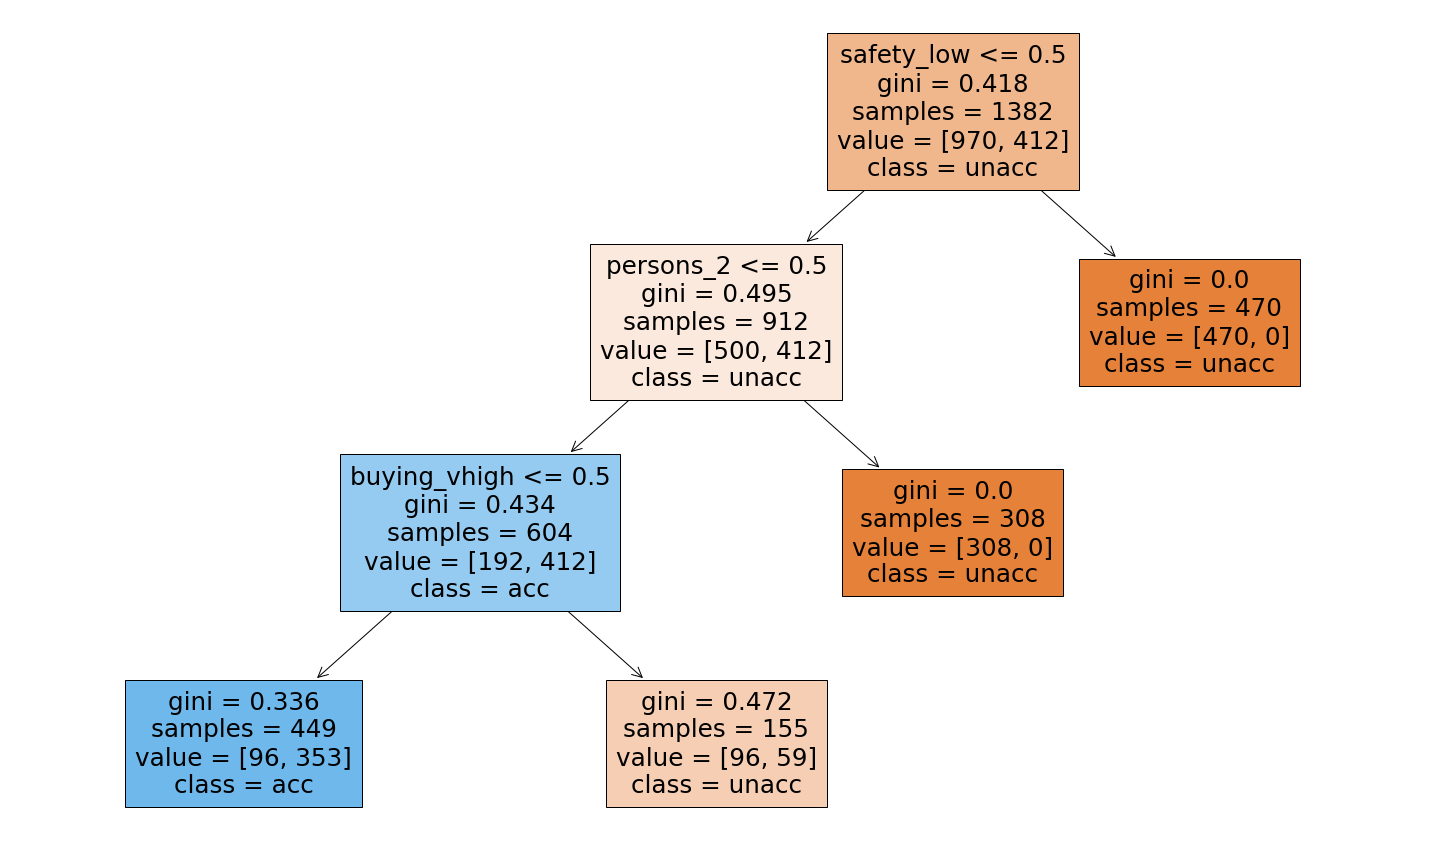

In [12]:
plt.figure(figsize=(20,12))
tree.plot_tree(dt, 
               feature_names = x_train.columns, 
               max_depth=5, 
               class_names = ['unacc', 'acc'], 
               label='all', 
               filled=True)
plt.tight_layout()
plt.show()

## Solution 2 

In [15]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

In [16]:
len(x_train), len(x_test)

(1382, 346)

In [17]:
dtree = DecisionTreeClassifier()
print(f'Decision Tree parameters: {dtree.get_params()}')

Decision Tree parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [24]:
dtree.fit(x_train, y_train)
## 2. Fit decision tree on training set and print the depth of the tree
print(f'Decision tree depth: {dtree.get_depth()}')

## 3. Predict on test data and accuracy of model on test set
y_pred = dtree.predict(x_test)


print(f'Test set accuracy: {dtree.score(x_test, y_test)}') # or accuracy_score(y_test, y_pred)

Decision tree depth: 11
Test set accuracy: 0.9826589595375722


## Determine what flag (Decision Tree) 

In [27]:
#import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [28]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", names = cols)

#variable names to use as predictors
var = [ 'red', 'green', 'blue','gold', 'white', 'black', 'orange', 'mainhue','bars','stripes', 'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']

In [30]:
df.sample(2)

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
26,Bulgaria,3,1,111,9,5,6,0,3,5,1,1,1,1,1,0,0,red,0,0,0,0,1,0,0,1,1,0,white,red
173,Trinidad-Tobago,2,4,5,1,1,1,0,0,3,1,0,0,0,1,1,0,red,0,0,0,0,0,0,1,0,0,0,white,white


In [32]:
#Print number of countries by landmass, or continent
df['landmass'].value_counts()

4    52
5    39
3    35
1    31
6    20
2    17
Name: landmass, dtype: int64

In [33]:
#Create a new dataframe with only flags from Europe and Oceania
df_36 = df.loc[df['landmass'].isin([3, 6])].copy()
df_36.shape

(55, 30)

In [41]:
df_36[var]

,red,green,blue,gold,white,black,orange,mainhue,bars,stripes,circles,crosses,saltires,quarters,sunstars,triangle,animate
1,1,0,0,1,0,1,0,red,0,0,0,0,0,0,1,0,1
3,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,0,1,1
4,1,0,1,1,0,0,0,gold,3,0,0,0,0,0,0,0,0
10,1,0,1,0,1,0,0,blue,0,0,0,1,1,1,6,0,0
11,1,0,0,0,1,0,0,red,0,3,0,0,0,0,0,0,0
16,1,0,0,1,0,1,0,gold,3,0,0,0,0,0,0,0,0
26,1,1,1,1,1,0,0,red,0,3,0,0,0,0,1,0,1
41,1,0,1,0,1,0,0,blue,0,0,1,1,1,1,15,0,0
44,0,1,0,1,1,0,0,white,0,0,0,0,0,0,0,0,1
45,1,0,1,0,1,0,0,white,0,0,0,0,0,0,0,1,0


In [47]:
#Print the average vales of the predictors for Europe and Oceania
df_36.groupby('landmass')[var].mean()

,red,green,blue,gold,white,black,orange,bars,stripes,circles,crosses,saltires,quarters,sunstars,triangle,animate
landmass,,,,,,,,,,,,,,,,
3,0.828571,0.2,0.514286,0.428571,0.771429,0.171429,0.057143,0.628571,1.285714,0.028571,0.285714,0.028571,0.028571,0.142857,0.028571,0.114286
6,0.800000,0.2,0.800000,0.600000,0.950000,0.150000,0.150000,0.000000,0.400000,0.150000,0.400000,0.300000,0.400000,3.300000,0.250000,0.300000


In [50]:
df_hue_dummy = pd.get_dummies(df_36['mainhue'])

In [52]:
labels = df_36["landmass"]

In [65]:
#Split data into a train and test set
train_data, test_data, train_labels, test_labels = train_test_split(df_hue_dummy, labels, random_state=1, test_size=.4)

In [66]:
len(train_data), len(test_data)

(33, 22)

In [78]:
#Fit a decision tree for max_depth values 1-20; save the accuracy score in acc_depth
depths = range(1, 21)
acc_depth = []
for i in depths:
    dtree = DecisionTreeClassifier(max_depth=i)
    print(f'Decision Tree parameters: {dtree.get_params()}')
    dtree.fit(train_data, train_labels)
    acc_depth.append(dtree.score(test_data, test_labels))

Decision Tree parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Decision Tree parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Decision Tree parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Decision Tree parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_d

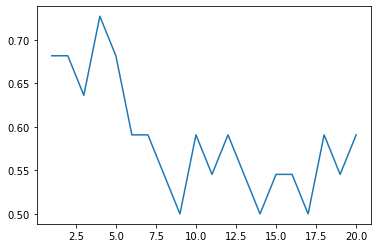

In [80]:
plt.plot(depths, acc_depth)

In [82]:
#Find the largest accuracy and the depth this occurs
max_acc = np.max(acc_depth)
best_depth = depths[np.argmax(acc_depth)]
print(f'Highest accuracy {round(max_acc,3)*100}% at depth {best_depth}')

Highest accuracy 72.7% at depth 4


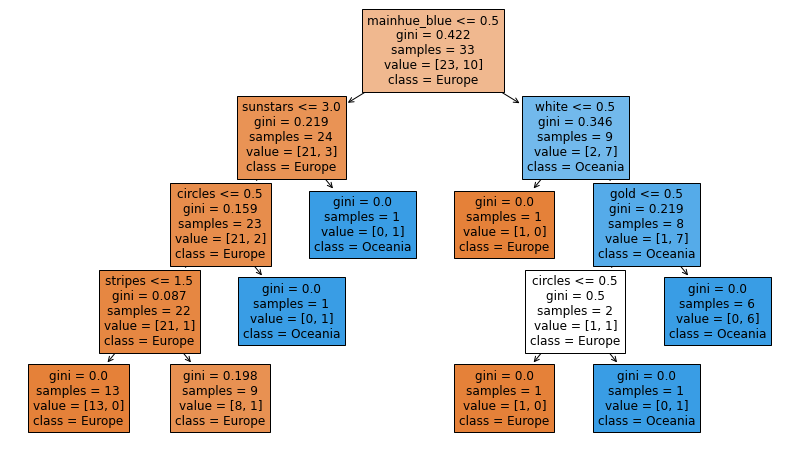

In [83]:
#Refit decision tree model with the highest accuracy and plot the decision tree
plt.figure(figsize=(14,8))
dt = DecisionTreeClassifier(random_state = 1, max_depth = best_depth)
dt.fit(train_data, train_labels)
tree.plot_tree(dt, feature_names = train_data.columns,  
               class_names = ['Europe', 'Oceania'],
                filled=True)
plt.show()


In [ ]:
#Find the largest accuracy and the depth this occurs


#Refit decision tree model with the highest accuracy and plot the decision tree


#Create a new list for the accuracy values of a pruned decision tree.  Loop through
#the values of ccp and append the scores to the list


#Plot the accuracy vs ccp_alpha


#Find the largest accuracy and the ccp value this occurs


#Fit a decision tree model with the values for max_depth and ccp_alpha found above


#Plot the final decision tree
